<a href="https://colab.research.google.com/github/laurenchlebove/CS381/blob/main/L_Chlebove_Project3_assn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


df = pd.read_csv("https://raw.githubusercontent.com/laurenchlebove/CS381/main/imports-85.data", header = None)
df.columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", 
              "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight",
              "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", 
              "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
df_original = df.copy()
print(df.dtypes)
df.head()


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


We know from the data source that there are 205 instances with 26 attributes each, and missing values are denoted by "?" and are found in the data set in the following instances:

* normalized-losses: 41
* num-of-doors: 2
* bore: 4
* stroke: 4
* horsepower: 2
* peak-rpm: 2
* price: 4

Immediately, the number of missing values in "normalized-loses" jumps out as abnormal when compared to the amount of missing values in the other attributes. Since we know from the data description that the "normalized-losses" attribute is the relative average loss payment per insured vehicle year and normalized for all autos within a particular size classification, cases which have similar values in attributes relating to size classification or safety such as "make", "num-of-doors", "symboling", "body-style", "length", "width", or "height" are more likely to have the same value for "normalized-losses" than a case without such similarities. We could potentially use this fact to replace the missing "normalized-losses" values without having to omit the attribute entirely or change the shape of its values. However, given that 41 values out of the 205 cases are missing, it means we are lacking 20% of our data in that attribute, which is a significant amount. Therefore, we choose to omit the "normalized-losses" attritube entirely, leaving only 25 other attributes to consider.


In [133]:
df = df.drop("normalized-losses", axis = 1)
df.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


The rest of the missing values are make up less than 10% of the data in their respective attributes, so filling in their values with the mean should not change the shape of data overmuch. However, as the "num-of-doors" attribute has only the options "two" or "four", the median would not make sense in this case. We will instead use the mode.

Furthermore, we notice that "bore", "stroke", "horsepower", "peak-rpm", and "price" are represented by objects, when really having numerical representations would be more useful. Below, we fill in the missing values and covert attributes that should be represented numerically into ints and floats respectively.

In [149]:
# changes "?"s to the mode for "num-of-doors" attribute
mode_imp = SimpleImputer(missing_values = "?", strategy = "most_frequent")
mode_imp.fit(df["num-of-doors"].values.reshape(-1, 1))
df["num-of-doors"] = mode_imp.transform(df["num-of-doors"].values.reshape(-1, 1))

# calculates the median of "bore"
bore_array = np.array(df[df["bore"] != "?"]["bore"])
bore_array = [float(x) for x in bore_array]
bore_median = np.median(bore_array)

# changes "bore" values into floats and fills in "?"s with the median
for i in range(len(df)):
  if df.iloc[i, 17] == "?":
    df.iloc[i, 17] = bore_median
df["bore"] = pd.to_numeric(df["bore"])

# calculates the median of "stroke"
stroke_array = np.array(df[df["stroke"] != "?"]["stroke"])
stroke_array = [float(x) for x in stroke_array]
strooke_median = np.median(stroke_array)

# changes "stroke" values into floats and fills in "?"s with the median
for i in range(len(df)):
  if df.iloc[i, 18] == "?":
    df.iloc[i, 18] = bore_median
df["stroke"] = pd.to_numeric(df["stroke"])

# calculates the median of "horsepower"
horsepower_array = np.array(df[df["horsepower"] != "?"]["horsepower"])
horsepower_array = [int(x) for x in horsepower_array]
horsepower_median = np.median(horsepower_array)

# changes "horsepower" values into ints and fills in "?"s with the median
for i in range(len(df)):
  if df.iloc[i, 20] == "?":
    df.iloc[i, 20] = horsepower_median
df["horsepower"] = pd.to_numeric(df["horsepower"])

# calculates the median of "peak-rpm"
peak_array = np.array(df[df["peak-rpm"] != "?"]["peak-rpm"])
peak_array = [int(x) for x in peak_array]
peak_median = np.median(peak_array)

# changes "peak-rpm" values into ints and fills in "?"s with the median
for i in range(len(df)):
  if df.iloc[i, 21] == "?":
    df.iloc[i, 21] = peak_median
df["peak-rpm"] = pd.to_numeric(df["peak-rpm"])

# calculates the median of "price"
price_array = np.array(df[df["price"] != "?"]["price"])
price_array = [int(x) for x in price_array]
price_median = np.median(price_array)

# changes "price" values into ints and fills in "?"s with the median
for i in range(len(df)):
  if df.iloc[i, 24] == "?":
    df.iloc[i, 24] = price_median
df["price"] = pd.to_numeric(df["price"])

print(df.dtypes)


symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

<h3>Visual Representations (Non-Numeric)</h3>



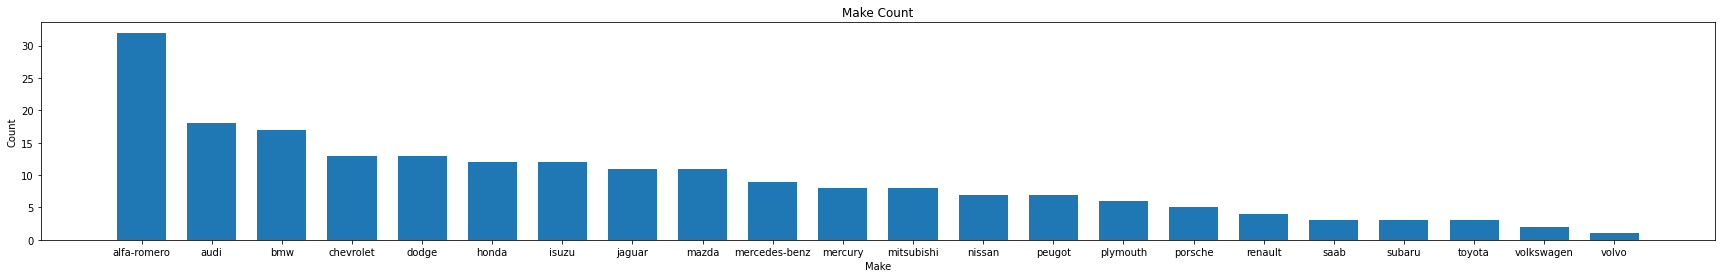

In [164]:
# make
fig1 = plt.figure(figsize = (30, 4))
plt.bar(["alfa-romero", "audi", "bmw", "chevrolet", "dodge", "honda", "isuzu", "jaguar", "mazda", 
         "mercedes-benz", "mercury", "mitsubishi", "nissan", "peugot", "plymouth", "porsche", "renault", 
         "saab", "subaru", "toyota", "volkswagen", "volvo"], df["make"].value_counts(), width = 0.7)
plt.title("Make Count")
plt.xlabel("Make")
plt.ylabel("Count")
plt.show()

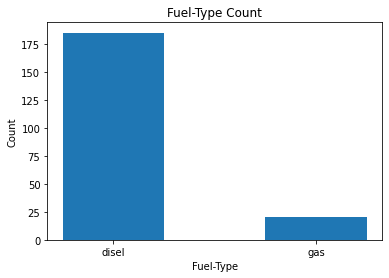

In [168]:
# fuel-type
fig2 = plt.figure(figsize = (6, 4))
plt.bar(["disel", "gas"], df["fuel-type"].value_counts(), width = 0.5)
plt.title("Fuel-Type Count")
plt.xlabel("Fuel-Type")
plt.ylabel("Count")
plt.show()

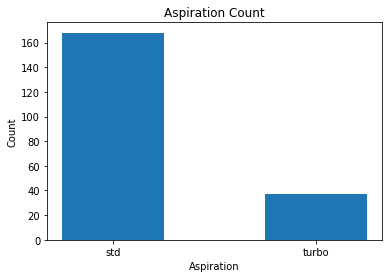

In [169]:
# aspiration
fig3 = plt.figure(figsize = (6, 4))
plt.bar(["std", "turbo"], df["aspiration"].value_counts(), width = 0.5)
plt.title("Aspiration Count")
plt.xlabel("Aspiration")
plt.ylabel("Count")
plt.show()

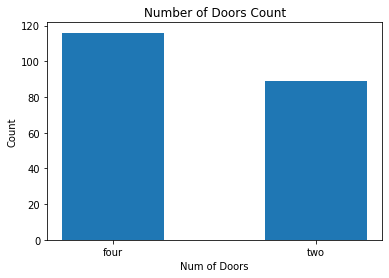

In [172]:
# num-of-doors
fig4 = plt.figure(figsize = (6, 4))
plt.bar(["four", "two"], df["num-of-doors"].value_counts(), width = 0.5)
plt.title("Number of Doors Count")
plt.xlabel("Num of Doors")
plt.ylabel("Count")
plt.show()

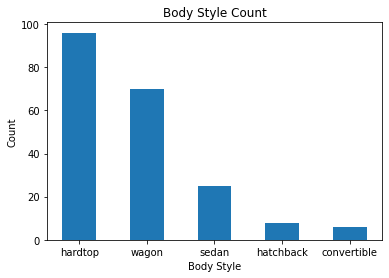

In [173]:
# body-style
fig5 = plt.figure(figsize = (6, 4))
plt.bar(["hardtop", "wagon", "sedan", "hatchback", "convertible"], df["body-style"].value_counts(), width = 0.5)
plt.title("Body Style Count")
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.show()

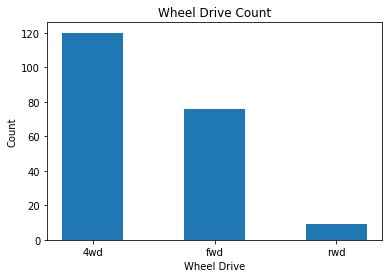

In [174]:
# drive-wheels
fig6 = plt.figure(figsize = (6, 4))
plt.bar(["4wd", "fwd", "rwd"], df["drive-wheels"].value_counts(), width = 0.5)
plt.title("Wheel Drive Count")
plt.xlabel("Wheel Drive")
plt.ylabel("Count")
plt.show()

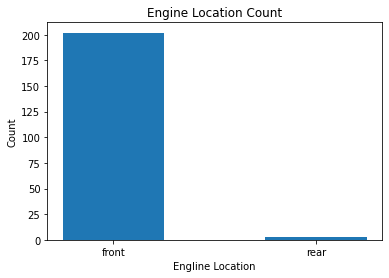

In [209]:
# engine-location
fig7 = plt.figure(figsize = (6, 4))
plt.bar(["front", "rear"], df["engine-location"].value_counts(), width = 0.5)
plt.title("Engine Location Count")
plt.xlabel("Engline Location")
plt.ylabel("Count")
plt.show()

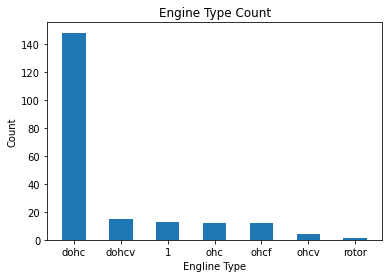

In [176]:
# engine-type
fig8 = plt.figure(figsize = (6, 4))
plt.bar(["dohc", "dohcv", "1", "ohc", "ohcf", "ohcv", "rotor"], df["engine-type"].value_counts(), width = 0.5)
plt.title("Engine Type Count")
plt.xlabel("Engline Type")
plt.ylabel("Count")
plt.show()

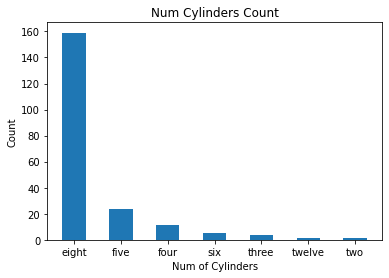

In [177]:
# num-of-cylinders
fig9 = plt.figure(figsize = (6, 4))
plt.bar(["eight", "five", "four", "six", "three", "twelve", "two"], df["num-of-cylinders"].value_counts(), width = 0.5)
plt.title("Num Cylinders Count")
plt.xlabel("Num of Cylinders")
plt.ylabel("Count")
plt.show()

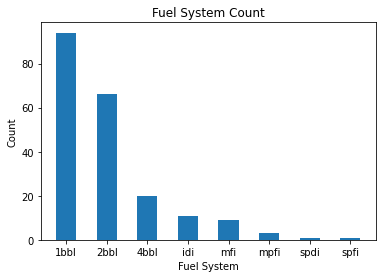

In [179]:
# fuel-system
fig10 = plt.figure(figsize = (6, 4))
plt.bar(["1bbl", "2bbl", "4bbl", "idi", "mfi", "mpfi", "spdi", "spfi"], df["fuel-system"].value_counts(), width = 0.5)
plt.title("Fuel System Count")
plt.xlabel("Fuel System")
plt.ylabel("Count")
plt.show()

<h3>Visual Representations (Numeric)</h3>

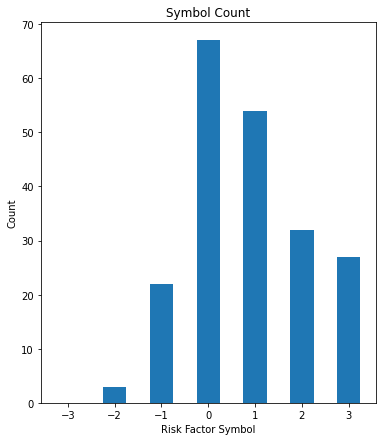

In [193]:
fig11 = plt.figure(figsize = (6, 7))

num_neg3 = num_neg2 = num_neg1 = num_0 = num_1 = num_2 = num_3 = 0
for x in df["symboling"]:
  if x == (-3):
    num_neg3 += 1
  elif x == (-2):
    num_neg2 += 1
  elif x == (-1):
    num_neg1 += 1
  elif x == 0:
    num_0 += 1
  elif x == 1:
    num_1 += 1
  elif x == 2:
    num_2 += 1
  else:
    num_3 += 1

plt.bar([-3,-2, -1, 0, 1, 2, 3], [num_neg3, num_neg2, num_neg1, num_0, num_1, num_2, num_3], width = 0.5)
plt.title("Symbol Count")
plt.xlabel("Risk Factor Symbol")
plt.ylabel("Count")
plt.show()

Text(0.5, 1.0, 'Wheel Base')

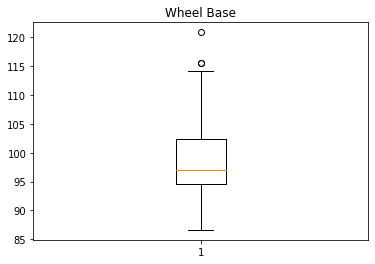

In [194]:
# wheel-base
plt.boxplot(df["wheel-base"])
plt.title("Wheel Base")

Text(0.5, 1.0, 'Length')

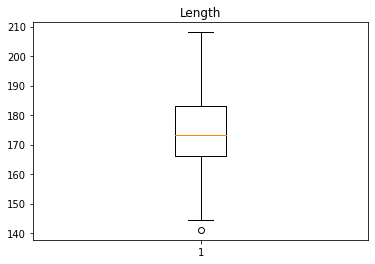

In [207]:
# length
plt.boxplot(df["length"])
plt.title("Length")

Text(0.5, 1.0, 'Width')

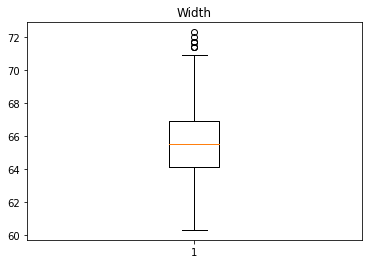

In [206]:
# width
plt.boxplot(df["width"])
plt.title("Width")

Text(0.5, 1.0, 'Height')

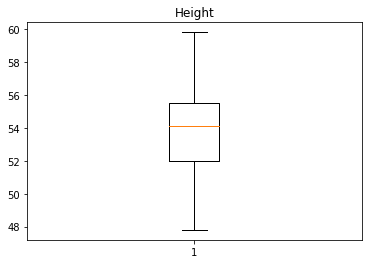

In [205]:
# height
plt.boxplot(df["height"])
plt.title("Height")

Text(0.5, 1.0, 'Curb Weight')

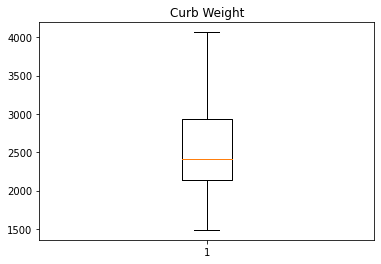

In [204]:
# curb-weight
plt.boxplot(df["curb-weight"])
plt.title("Curb Weight")

Text(0.5, 1.0, 'Engine Size')

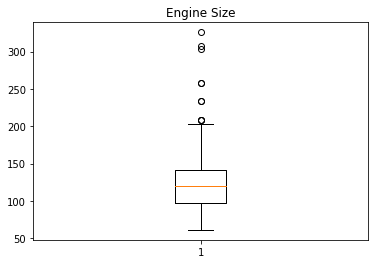

In [203]:
# engine-size
plt.boxplot(df["engine-size"])
plt.title("Engine Size")

Text(0.5, 1.0, 'Bore')

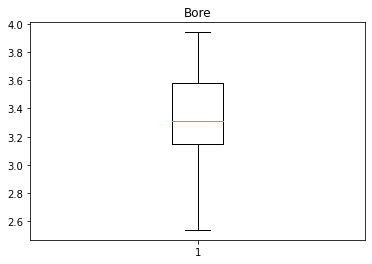

In [202]:
# bore
plt.boxplot(df["bore"])
plt.title("Bore")

Text(0.5, 1.0, 'Stroke')

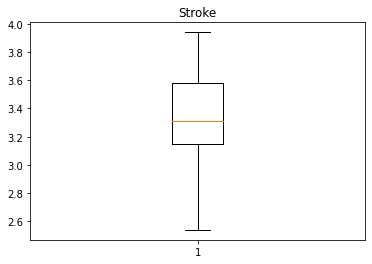

In [201]:
# stroke
plt.boxplot(df["stroke"])
plt.title("Stroke")

Text(0.5, 1.0, 'Compression Ratio')

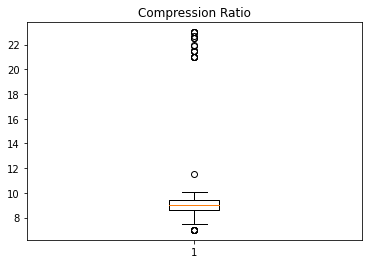

In [200]:
# compression-ratio
plt.boxplot(df["compression-ratio"])
plt.title("Compression Ratio")

Text(0.5, 1.0, 'Horsepower')

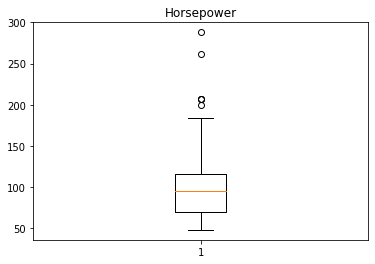

In [199]:
# horsepower
plt.boxplot(df["horsepower"])
plt.title("Horsepower")

Text(0.5, 1.0, 'Peak RPM')

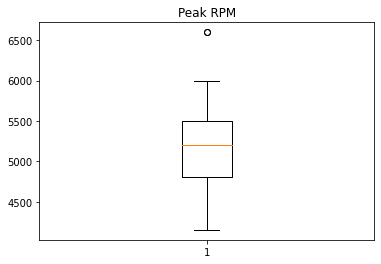

In [198]:
# peak-rpm
plt.boxplot(df["peak-rpm"])
plt.title("Peak RPM")

Text(0.5, 1.0, 'City MPG')

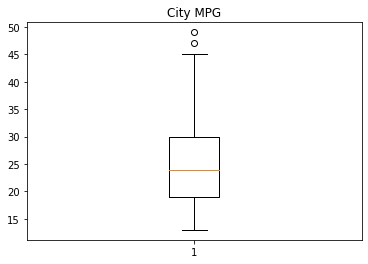

In [208]:
# city-rpm
plt.boxplot(df["city-mpg"])
plt.title("City MPG")

Text(0.5, 1.0, 'Highway MPG')

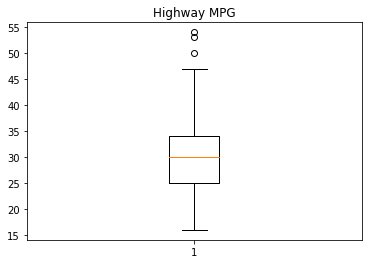

In [196]:
# highway-mpg
plt.boxplot(df["highway-mpg"])
plt.title("Highway MPG")

Text(0.5, 1.0, 'Price')

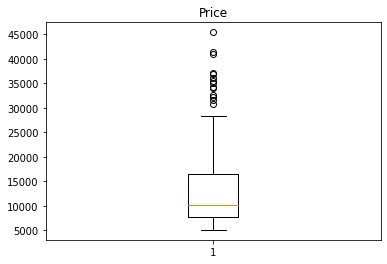

In [195]:
# price
plt.boxplot(df["price"])
plt.title("Price")

According to the box plots, it is likely that attributes "engine-size", "compression-ratio", and "price" contain outliers that could skew the data. For "compression-ratio" in particular, there seems to be a split in the data

In [210]:
df[df["compression-ratio"] < 10]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,3.47,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,3.47,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,2.68,9.0,154,5000,19,26,16500
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.19,8.0,115,5500,18,22,17450
5,2,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.19,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,volvo,gas,turbo,four,wagon,rwd,front,104.3,188.8,...,130,mpfi,3.62,3.62,7.5,162,5100,17,22,18950
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.78,9.5,114,5400,23,28,16845
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.78,8.7,160,5300,19,25,19045
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,3.58,8.8,134,5500,18,23,21485


In [211]:
df[df["compression-ratio"] >= 10]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.19,10.0,102,5500,24,30,13950
32,1,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,...,79,1bbl,2.91,2.91,10.1,60,5500,38,42,5399
49,0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,...,326,mpfi,3.54,3.54,11.5,262,5000,13,17,36000
63,0,mazda,diesel,std,four,sedan,fwd,front,98.8,177.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795
66,0,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,...,134,idi,3.43,3.43,22.0,72,4200,31,39,18344
67,-1,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,...,183,idi,3.58,3.58,21.5,123,4350,22,25,25552
68,-1,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,...,183,idi,3.58,3.58,21.5,123,4350,22,25,28248
69,0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,...,183,idi,3.58,3.58,21.5,123,4350,22,25,28176
70,-1,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,...,183,idi,3.58,3.58,21.5,123,4350,22,25,31600
90,1,nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,...,103,idi,2.99,2.99,21.9,55,4800,45,50,7099


According to ScienceDirect.com, the compression ratio is the ratio of the volume of the cylinder and its head space when the piston is at the bottom of its stroke to the volume of the head space when the piston is at the top of its travel. In gas engines it is usually 8-10, whereas for diesel engines it is more like 15-20. This explains the gap in our data, and there for might merit two separate representation of the "compression-ratio" attribute: one for diesel fuel types and one for gas.

Text(0.5, 1.0, 'Compression Ratio of Gas Vehicles')

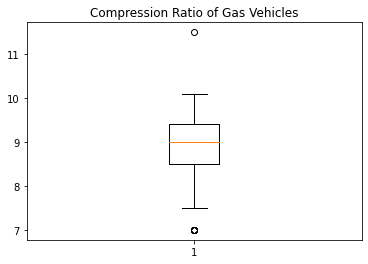

In [212]:
# gas compression-ratio
plt.boxplot(df[df["fuel-type"] == "gas"]["compression-ratio"])
plt.title("Compression Ratio of Gas Vehicles")

Text(0.5, 1.0, 'Compression Ratio of Disel Vehicles')

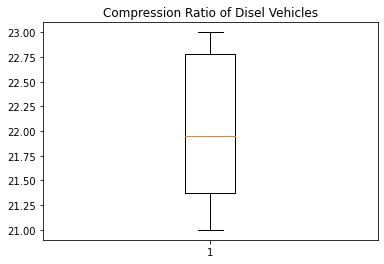

In [214]:
# diesel compression-ratio
plt.boxplot(df[df["fuel-type"] == "diesel"]["compression-ratio"])
plt.title("Compression Ratio of Disel Vehicles")

These representations fit the data much better. The variation in price is likely due to the difference in cost between more luxury brands like Mercedes-Benz and BMW.

In [223]:
print("Mean of Mercedes-Benz prices: ", df[df["make"] == "mercedes-benz"]["price"].mean())
print("Mean of BMW prices: ", df[df["make"] == "bmw"]["price"].mean())
print("Mean of all vehicle prices: ", df["price"].mean())

Mean of Mercedes-Benz prices:  33647.0
Mean of BMW prices:  26118.75
Mean of all vehicle prices:  13150.307317073171


Given that each mean is almost or over twice as much as the mean of all of the cars, it is obviously that the price varies wildly depending on the make of the car, especially consderin that even the mean that we calculated is being pulled up by the more luxury car prices. A more honest representation would differentiate between luxury and non-luxury cars.

As for "engine size", it seems to be correlated with some particular makes, most likely a difference in design between certain brands.

In [224]:
df[df["engine-size"] > 200]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
15,0,bmw,gas,std,four,sedan,rwd,front,103.5,189.0,...,209,mpfi,3.62,3.62,8.0,182,5400,16,22,30760
16,0,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,...,209,mpfi,3.62,3.62,8.0,182,5400,16,22,41315
17,0,bmw,gas,std,four,sedan,rwd,front,110.0,197.0,...,209,mpfi,3.62,3.62,8.0,182,5400,15,20,36880
47,0,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,...,258,mpfi,3.63,3.63,8.1,176,4750,15,19,32250
48,0,jaguar,gas,std,four,sedan,rwd,front,113.0,199.6,...,258,mpfi,3.63,3.63,8.1,176,4750,15,19,35550
49,0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,...,326,mpfi,3.54,3.54,11.5,262,5000,13,17,36000
71,-1,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,202.6,...,234,mpfi,3.46,3.46,8.3,155,4750,16,18,34184
72,3,mercedes-benz,gas,std,two,convertible,rwd,front,96.6,180.3,...,234,mpfi,3.46,3.46,8.3,155,4750,16,18,35056
73,0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,208.1,...,308,mpfi,3.80,3.80,8.0,184,4500,14,16,40960
74,1,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,199.2,...,304,mpfi,3.80,3.80,8.0,184,4500,14,16,45400


<h3>Conclusion</h3>

Overall, though there were 26 attributes to work with, many of them seem to be highly correlated with one another, making some of the data feel redundant. A car of the same make and body-style generally has a similar, length, width, height, engine location, horsepower, engine-size, and more. However, these values can vary wildly when switching between brands of car, because there is no uniform design. The numerous outliers show the differences that exist from one car make to another.

<h3>References</h3>

https://www.sciencedirect.com/topics/engineering/compression-ratio

1. (10 Points) Which numeric variables contained within the data set appear to require the use of a
feature scaling method for purposes of preparing them for use within a machine learning algorithm?
Be sure to list each relevant variable and explain why you believe each variable that you’ve identified
requires the use of some sort of feature scaling method.

Price likely requires scaling because it varies wildly between different vehicle manufacturers.


2. (15 Points) Consider the number-of-doors and price variables: Based on your EDA work, how many
missing data values occur within each of these attributes? As we’ve learned, missing data values can
impede the proper functioning of many machine learning algorithms. To address the missing the
number-of-doors and price values, you have been instructed to formulate what you believe will be an
1
effective data imputation approach for purposes of estimating reasonable proxies for the missing data
values. Your supervisor tells you that the affected data observations MUST be retained within the data
set, and that it would be inappropriate to use either a mean, median, or mode value for any of the
missing values since doing so would increase the likelihood of introducing unwarranted bias within the
data set. Describe the imputation method you would employ for each variable. Then, using your
Python skills, apply your prescribed imputation methods to the variables. Be sure to include graphics
and commentary that explain your approach as well as the results of your efforts.

Num-of-Doors was missing two values while Price was missing four values. I would use the fact that the data source stated that the relative average loss payment per insured vehicle year is normalized for all autos within a particular size classification, so attributes that give an idea of size like "make", "num-of-doors", "length", "width", "height", etc can give a fairly accurate estimation of what "normalized-losses" should be.



In [ ]:
normalized_losses_median = df[df["normalized-losses"] != "?"]["normalized-losses"].median()

cut_cols = ["fuel-type", "aspiration", "drive-wheels", "engine-location", "wheel-base", 
            "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", 
            "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", 
            "highway-mpg", "price"]
missing_norm = df[df["normalized-losses"] == "?"].drop(cut_cols, axis = 1)
non_missing_norm = df[df["normalized-losses"] != "?"].drop(cut_cols, axis = 1)

highest_match = 0
curr_match = 0
highest_match_col_index = 0
corr_norm_loss_values = []


for i in range(len(missing_norm)):
  for j in range(len(non_missing_norm)):
    for k in range(8):
      if missing_norm.iloc[i, k] == non_missing_norm.iloc[j, k]:
        curr_match += 1
    if curr_match > highest_match:
      highest_match = curr_match
      highest_match_col_index = j
      curr_match = 0
  if (non_missing_norm.iloc[highest_match_col_index, 2] != missing_norm.iloc[i, 2] and 
      non_missing_norm.iloc[highest_match_col_index, 6] != missing_norm.iloc[i, 6]):
    corr_norm_loss_values.append(normalized_losses_median)
  else:
    corr_norm_loss_values.append(non_missing_norm.iloc[highest_match_col_index, 1])

for x in range(len(df)):
  if df.iloc[x, 1] == "?":
    df.iloc[x, 1] = corr_norm_loss_values[0]
    corr_norm_loss_values = corr_norm_loss_values[1:]

3. (15 Points) Consider the engine-size and stroke variables: Describe the specific feature scaling method
you would apply to each of them. Then, using Python, generate both a histogram and a boxplot for the
original content of these two variables. Next, apply your prescribed feature scaling methods to the two
variables and create histograms and boxplots that show the results of your feature scaling efforts.
Compare your newly created plots against the plots you created for the original content of the
variables. Comment on whether your feature scaling efforts improved the distribution of the data. If
your feature scaling efforts did not improve the distribution of the data, explain why you believe your
efforts were not effective.


Given that the range of engine-size is from 61 to 326 and the range of stroke is 2.07 to 4.17, I would scale stroke up and scale engine-size down.


4. (15 Points) Consider the symboling, make, and engine-type variables:
A) For each variable, specify whether its content is numeric/continuous, numeric/discrete,
categorical/nominal, or categorical/ordinal
B) For each variable, describe the methodology you would employ for purposes of preparing its data
values for use within a machine learning algorithm.
C) Using your Python skills, apply your prescribed data preparation methodologies to the three
variables. Be sure to show a sample of your results within your Notebook.

make: categorical/nominal
symboling: categorical/ordinal
engine-type: categorical/nominal

5. (15 Points) Consider the wheel-base, length, width, height, curb-weight, engine-size, compression ratio,
horsepower, peak-rpm, and city-mpg variables. Using your dimensionality reduction expertise, use
Python to reduce the dimensionality of this group of variables to a set of new orthogonal features. Be
sure to include appropriate commentary explaining the dimensionality reduction method you have
elected to implement and discuss the results of your efforts. For example, you should explain how
many orthogonal features your approach has generated as well as how much variability is explained by
each of your new features.

Wheel-base, length, width, height, curb-weight, engine-size, compression ratio,
horsepower, peak-rpm, and city-mpg variables each vary wildly based on the make of the car, because each design is different.